In [1]:
import pandas as pd



In [2]:
df = pd.read_csv('/home/eva/results/datasets/cremona/cremona.csv', delimiter = ' ', names = ['cond','isog', 'num','label','rk','tors'])
df.drop_duplicates(subset=('cond','isog'), inplace=True,keep='first')


In [2]:
bsd = pd.read_csv('/home/eva/results/datasets/bsd/BSDdata.csv', names = ['cond', 'a1','a2','a3','a4','a6','sign','sha','rk','reg','tama','tors','rp'])
bsd['L']  = bsd['sha']*bsd['tama']*bsd['rp']*bsd['reg']/(bsd['tors']**2)

#bsd = pd.read_csv('/home/eva/results/datasets/bsd/bsdlmfdb.csv',names = ['cond', 'isog','num','curve','rk','tors','tama','rp','L','reg','sha'], delimiter = ' ')
#bsd = bsd[bsd['cond'] <= 500000]



In [3]:
bsd

,cond,a1,a2,a3,a4,a6,sign,sha,rk,reg,tama,tors,rp,L
0,11,[0,-1,1,0,0],-1,1,0,1.000000,1,5,6.346047,0.253842
1,11,[0,-1,1,-10,-20],-1,1,0,1.000000,5,5,1.269209,0.253842
2,11,[0,-1,1,-7820,-263580],-1,1,0,1.000000,1,1,0.253842,0.253842
3,17,[1,-1,1,-1,0],1,1,0,1.000000,1,4,6.188319,0.386770
4,17,[1,-1,1,-1,-14],-1,1,0,1.000000,4,4,1.547080,0.386770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1872959,999996989,[0,-1,1,-1959,34000],1,1,0,1.000000,1,1,1.556813,1.556813
1872960,999998423,[1,-1,1,213,-990],-1,1,2,6.879965,1,1,0.854537,5.879187
1872961,999998563,[0,-1,1,-644,6691],-1,1,0,1.000000,1,1,1.553255,1.553255
1872962,999999017,[1,0,1,-306,-2583],-1,1,2,50.203519,1,1,0.561868,28.207758


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec

# Assuming 'bsd' is your dataframe with columns 'rk', 'cond', and 'reg'

# Set the style for the seaborn plots
sns.set(style='whitegrid')

# Create a GridSpec with 2 rows and 5 columns
gs = GridSpec(2, 5)

# Define the positions of the subplots using the GridSpec
positions = [gs[0, 1:2], gs[0, 3:4], gs[1, 0:1], gs[1, 2:3], gs[1, 4:5]]

# Create a figure
fig = plt.figure(figsize=(20, 10))

# Loop through the ranks (conditions) and create a scatter plot for each rank
for rank, position in zip(range(1, 6), positions):
    temp = bsd[bsd['rk'] == rank]

    xval = temp['cond']
    yval = temp['reg']

    # Create a scatter plot for the current rank
    ax = fig.add_subplot(position)
    ax.scatter(xval, yval)

    # Set the title for the current subplot
    ax.set_title(f'Rank: {rank}')

    # Set the x-axis label for the current subplot
    ax.set_xlabel('Conductor')

# Set a common ylabel for all subplots
fig.text(0.06, 0.5, 'Regulator', ha='center', va='center', rotation='vertical', fontsize=12)

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.01, hspace=0.3)

# Show the plot
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
from tabulate import tabulate

# Assuming 'bsd' is your dataframe with columns 'rk', 'cond', and 'reg'

# Define a power-law function X^a
def power_law(x, a):
    return x**a

# Initialize an empty list to store the statistics
statistics_data = []

# Loop through the ranks (conditions) and calculate statistics for each rank
for rank in range(1, 4):
    temp = bsd[bsd['rk'] == rank]

    xval = temp['cond']
    yval = temp['reg']

    # Calculate statistics for the 'reg' column
    mean = np.mean(yval)
    median = np.median(yval)
    std_dev = np.std(yval)
    min_val = np.min(yval)
    max_val = np.max(yval)

    # Fit the power-law function to the data
    popt, _ = curve_fit(power_law, xval, yval)
    a = popt[0]

    # Store the statistics in a nested list
    statistics_data.append([mean, median, std_dev, min_val, max_val, a])

# Create a LaTeX table using the 'tabulate' library
headers = ['Rank 1', 'Rank 2', 'Rank 3']
row_labels = ['Mean', 'Median', 'Standard Deviation', 'Min', 'Max', 'Best-fit a']
table_data = list(zip(row_labels, *statistics_data))

# Output the table in LaTeX format
print(tabulate(table_data, headers=headers, tablefmt='latex_booktabs', floatfmt=".3f"))


In [ ]:
#### ANALYSIS OF L(S,1) ####
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'bsd' is your dataframe with columns 'rk', 'cond', and 'L'

# Set the style for the seaborn plots
sns.set(style='whitegrid')

# Create a 2x3 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10), sharey=True)


# Set the positions of the subplots
positions = [(0, 0), (0, 1), (1, 0), (1, 1)]

# Loop through the ranks (conditions) and create a scatter plot for each rank
for rank, position in zip(range(0, 4), positions):
    temp = bsd[bsd['rk'] == rank]

    xval = temp['cond']
    yval = temp['L']

    # Create a scatter plot for the current rank
    axes[position].scatter(xval, yval)

    # Set the title for the current subplot
    axes[position].set_title(f'Rank: {rank}')

    # Set the x-axis label for the current subplot
    axes[position].set_xlabel('Conductor')

# Set a common ylabel for all subplots
fig.text(0.06, 0.5, 'Central L-value', ha='center', va='center', rotation='vertical', fontsize=12)

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.1, hspace=0.3)

# Show the plot
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.optimize import curve_fit
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set the style for the seaborn plots
sns.set(style='whitegrid')
# Define a power-law function X^a
def power_law(x, a):
    return x**a

# Calculate the running average of 'L' values
bsd['L_running_avg'] = bsd['L'].expanding().mean()

# Create a scatter plot of 'L' values
plt.figure(figsize=(12, 6))

popt, _ = curve_fit(power_law, bsd['cond'], bsd['L'])
a = popt[0]

# Plot the running average of 'L' values
plt.plot(bsd['cond'], bsd['L_running_avg'], color='red', linestyle='-', label='Running Average')

# Plot the best-fit power-law function
x_range = np.logspace(0, 9, 1000)  # X values ranging from 1 to 10^9
plt.plot(x_range, power_law(x_range, a), color='blue', linestyle='--', label=f'Fit: X^{a:.2f}')


# Set the title, labels, and legend
plt.title('Central L-value Running Average')
plt.xlabel('x')
plt.ylabel('Central value')
plt.legend()

# Show the plot
plt.show()

In [3]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
from tabulate import tabulate

# Assuming 'bsd' is your dataframe with columns 'rk', 'cond', and 'reg'

# Define a power-law function X^a
def power_law(x, a):
    return x**a

# Initialize an empty list to store the statistics
statistics_data = []

# Loop through the ranks (conditions) and calculate statistics for each rank
for rank in range(0, 4):
    temp = bsd[bsd['rk'] == rank]

    xval = temp['cond']
    yval = temp['L']

    # Calculate statistics for the 'reg' column
    mean = np.mean(yval)
    median = np.median(yval)
    std_dev = np.std(yval)
    min_val = np.min(yval)
    max_val = np.max(yval)

    # Fit the power-law function to the data
    popt, _ = curve_fit(power_law, xval, yval)
    a = popt[0]

    # Store the statistics in a nested list
    statistics_data.append([mean, median, std_dev, min_val, max_val, a])

# Create a LaTeX table using the 'tabulate' library
headers = ['Rank 0','Rank 1', 'Rank 2', 'Rank 3']
row_labels = ['Mean', 'Median', 'Standard Deviation', 'Min', 'Max', 'Best-fit a']
table_data = list(zip(row_labels, *statistics_data))

# Output the table in LaTeX format
print(tabulate(table_data, headers=headers, tablefmt='latex_booktabs', floatfmt=".3f"))


\begin{tabular}{lrrrr}
\toprule
                    &   Rank 0 &   Rank 1 &   Rank 2 &   Rank 3 \\
\midrule
 Mean               &    2.856 &    7.746 &   12.091 &   12.931 \\
 Median             &    2.237 &    6.886 &   11.299 &   12.451 \\
 Standard Deviation &    2.286 &    4.161 &    5.129 &    4.560 \\
 Min                &    0.006 &    0.162 &    0.759 &    1.732 \\
 Max                &   36.727 &   48.979 &   46.644 &   30.266 \\
 Best-fit a         &    0.086 &    0.168 &    0.203 &    0.205 \\
\bottomrule
\end{tabular}


In [ ]:
#### Real PERIODT. ####

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec



# Assuming 'bsd' is your dataframe with columns 'rk', 'cond', and 'rp'

# Set the style for the seaborn plots
sns.set(style='whitegrid')

# Create a 2x3 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10), sharey=True)


# Set the positions of the subplots
positions = [(0, 0), (0, 1), (1, 0), (1, 1)]

# Loop through the ranks (conditions) and create a scatter plot for each rank
for rank, position in zip(range(0, 4), positions):
    temp = bsd[bsd['rk'] == rank]

    xval = temp['cond']
    yval = temp['rp']

    # Create a scatter plot for the current rank
    axes[position].scatter(xval, yval)

    # Set the title for the current subplot
    axes[position].set_title(f'Rank: {rank}')

    # Set the x-axis label for the current subplot
    axes[position].set_xlabel('Conductor')

# Set a common ylabel for all subplots
fig.text(0.06, 0.5, 'Real Period', ha='center', va='center', rotation='vertical', fontsize=12)

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.1, hspace=0.3)

# Show the plot
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.optimize import curve_fit

# Assuming 'bsd' is your dataframe with columns 'rk', 'cond', and 'rp'

# Define a power-law function X^a
def power_law(x, a):
    return x**a

# Loop through the ranks (conditions) and create a scatter plot for each rank
for rank in range(0, 6):
    temp = bsd[bsd['rk'] == rank]

    xval = temp['cond']
    yval = temp['rp']

    # Calculate and print statistics for the 'rp' column
    print(f"Rank: {rank}")
    print("Mean:", np.mean(yval))
    print("Median:", np.median(yval))
    print("Standard Deviation:", np.std(yval))
    print("Min:", np.min(yval))
    print("Max:", np.max(yval))

        # Define the function 1/(x^(1/12))
    def func(x):
        return 1 / (x ** (1 / 12))

    # Define the function 1/(x^(1/12))
    def func2(x):
        return np.log(x) / (x ** (1 / 12))

    # Create an array of x values (linearly spaced)
    x_min = 5
    x_max = 10**9
    x_range = np.linspace(x_min, x_max, 1000)

    # Calculate the y values using the function
    y_values = func(x_range)
    y_values2 = func2(x_range)

    # Create a scatter plot for the current rank
    plt.figure(figsize=(6, 4))
    plt.scatter(xval, yval, label='Data')


    plt.plot(x_range, y_values, label=r'$\frac{1}{x^{\frac{1}{12}}}$', color='red')
    plt.plot(x_range, y_values2, label=r'$\frac{log(x)}{x^{\frac{1}{12}}}$', color='green')


    # Set the title, labels, and legend
    plt.title(f'Rank: {rank}')
    plt.xlabel('Condition')
    plt.ylabel('rpulator')
    plt.legend()

    # Show the plot
    plt.show()


In [ ]:
import seaborn as sns
import numpy as np
from scipy.optimize import curve_fit
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set the style for the seaborn plots
sns.set(style='whitegrid')
# Define a power-law function X^a
def power_law(x, a):
    return x**(-1/12)*np.log(x)**a

# Calculate the running average of 'L' values
bsd['Real period running average'] = bsd['rp'].expanding().mean()

# Create a scatter plot of 'L' values
plt.figure(figsize=(12, 6))

popt, _ = curve_fit(power_law, bsd['cond'], bsd['rp'])
a = popt[0]

# Plot the running average of 'L' values
plt.plot(bsd['cond'], bsd['Real period running average'], color='red', linestyle='-', label='Running Average')

# Plot the best-fit power-law function
x_range = np.logspace(0, 9, 1000)  # X values ranging from 1 to 10^9
plt.plot(x_range, power_law(x_range, a), color='blue', linestyle='--', label=f'Fit: X^{a:.2f}')


# Set the title, labels, and legend
plt.title('Real Period Running Average')
plt.xlabel('Conductor')
plt.ylabel('Real Period')
plt.legend()

# Show the plot
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
from tabulate import tabulate

# Assuming 'bsd' is your dataframe with columns 'rk', 'cond', and 'reg'

# Define a power-law function X^a
def power_law(x, a):
    return x**(-1/12)*np.log(x)**a

# Initialize an empty list to store the statistics
statistics_data = []

# Loop through the ranks (conditions) and calculate statistics for each rank
for rank in range(0, 4):
    temp = bsd[bsd['rk'] == rank]

    xval = temp['cond']
    yval = temp['rp']

    # Calculate statistics for the 'reg' column
    mean = np.mean(yval)
    median = np.median(yval)
    std_dev = np.std(yval)
    min_val = np.min(yval)
    max_val = np.max(yval)

    # Fit the power-law function to the data
    popt, _ = curve_fit(power_law, xval, yval)
    a = popt[0]

    # Store the statistics in a nested list
    statistics_data.append([mean, median, std_dev, min_val, max_val, a])

# Create a LaTeX table using the 'tabulate' library
headers = ['Rank 0','Rank 1', 'Rank 2', 'Rank 3']
row_labels = ['Mean', 'Median', 'Standard Deviation', 'Min', 'Max', 'Best-fit a']
table_data = list(zip(row_labels, *statistics_data))

# Output the table in LaTeX format
print(tabulate(table_data, headers=headers, tablefmt='latex_booktabs', floatfmt=".3f"))


/tmp/ipykernel_7188/1934249337.py:24: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename,names = ['cond','a1','a2','a3','a4','a6','selmer','rp'])
/tmp/ipykernel_7188/1934249337.py:24: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename,names = ['cond','a1','a2','a3','a4','a6','selmer','rp'])
/tmp/ipykernel_7188/1934249337.py:24: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename,names = ['cond','a1','a2','a3','a4','a6','selmer','rp'])
/tmp/ipykernel_7188/1934249337.py:24: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename,names = ['cond','a1','a2','a3','a4','a6','selmer','rp'])
/tmp/ipykernel_7188/1934249337.py:24: DtypeWarning: Columns (5) have mixed types. Specify dtype option on im

/tmp/ipykernel_7188/1934249337.py:24: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename,names = ['cond','a1','a2','a3','a4','a6','selmer','rp'])
/tmp/ipykernel_7188/1934249337.py:24: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename,names = ['cond','a1','a2','a3','a4','a6','selmer','rp'])


ValueError: x and y must have same first dimension, but have shapes (40,) and (41,)

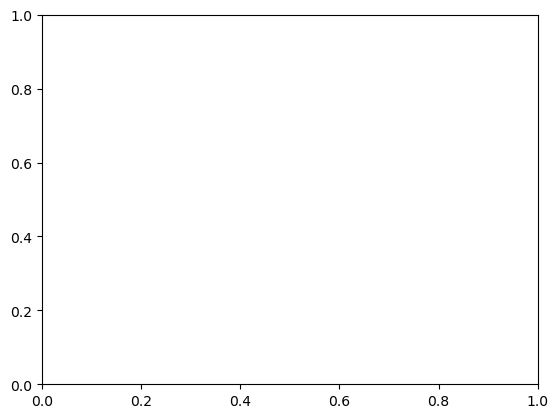

In [1]:
### SELMER GROUPS ###
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Initialize variables to store the running sum and count
running_sum = 0
count = 0
selmer_running_avg = []
df1 = pd.read_csv('/home/eva/results/selmer/Selmer_RP_00000.csv', names = ['cond','selmer'])

running_sum += df1['selmer'].sum()
count += len(df1)

# Calculate the running average and append it to the list
selmer_running_avg.append(running_sum / count)



# Iterate over all files and read their contents
for i in range(40):
    
    filename = '~/results/selmer/Selmer_RP_'+str(i).zfill(5)+'.csv'
    df = pd.read_csv(filename,names = ['cond','a1','a2','a3','a4','a6','selmer','rp'])
    
    # Update the running sum and count
    running_sum += df['selmer'].sum()
    count += len(df)
    
    # Calculate the running average and append it to the list
    selmer_running_avg.append(running_sum / count)




In [5]:
import pandas as pd

# Initialize variables to store the running count
count = 0
selmer_dict = {}
df1 = pd.read_csv('/home/eva/results/selmer/Selmer_RP_00000.csv', names=['cond', 'selmer'])

# Update count for the first dataframe
count += len(df1)

# Count unique occurrences of 'selmer' values in the first dataframe and update the selmer_dict
unique_counts = df1['selmer'].value_counts()
for key, value in unique_counts.items():
    selmer_dict[key] = selmer_dict.get(key, 0) + value

# Iterate over all files and read their contents
for i in range(1, 40):
    filename = '~/results/selmer/Selmer_RP_' + str(i).zfill(5) + '.csv'
    df = pd.read_csv(filename, names=['cond', 'a1', 'a2', 'a3', 'a4', 'a6', 'selmer', 'rp'])

    # Update the running count
    count += len(df)

    # Count unique occurrences of 'selmer' values and update the selmer_dict
    unique_counts = df['selmer'].value_counts()
    for key, value in unique_counts.items():
        selmer_dict[key] = selmer_dict.get(key, 0) + value

# Calculate the proportions of the unique values of 'selmer'
for key in selmer_dict:
    selmer_dict[key] /= count

print(selmer_dict)

/tmp/ipykernel_23427/2221024407.py:19: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename, names=['cond', 'a1', 'a2', 'a3', 'a4', 'a6', 'selmer', 'rp'])
/tmp/ipykernel_23427/2221024407.py:19: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename, names=['cond', 'a1', 'a2', 'a3', 'a4', 'a6', 'selmer', 'rp'])
/tmp/ipykernel_23427/2221024407.py:19: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename, names=['cond', 'a1', 'a2', 'a3', 'a4', 'a6', 'selmer', 'rp'])
/tmp/ipykernel_23427/2221024407.py:19: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename, names=['cond', 'a1', 'a2', 'a3', 'a4', 'a6', 'selmer', 'rp'])
/tmp/ipykernel_23427/2221024407.py:19: DtypeWarning: Columns (5) have mixed type

/tmp/ipykernel_23427/2221024407.py:19: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename, names=['cond', 'a1', 'a2', 'a3', 'a4', 'a6', 'selmer', 'rp'])
/tmp/ipykernel_23427/2221024407.py:19: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename, names=['cond', 'a1', 'a2', 'a3', 'a4', 'a6', 'selmer', 'rp'])


{2: 0.4363701032428038, 4: 0.2656956273783034, 1: 0.2282193486882944, 8: 0.06357920879904878, 16: 0.0059505997063668, 32: 0.0001843982702793775, 64: 7.139149034852493e-07}


/tmp/ipykernel_23427/2221024407.py:19: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename, names=['cond', 'a1', 'a2', 'a3', 'a4', 'a6', 'selmer', 'rp'])


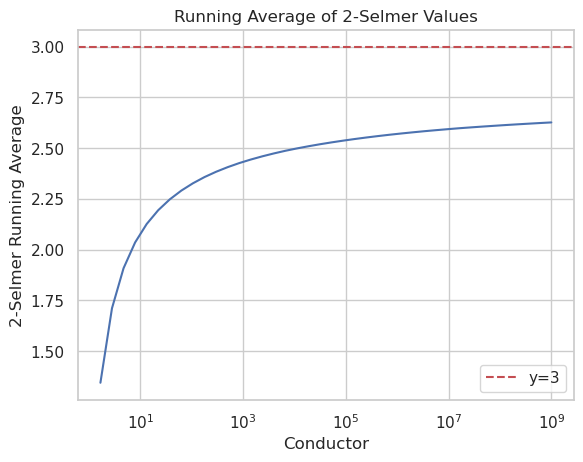

In [12]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Set the style for the seaborn plots
sns.set(style='whitegrid')

# Create a plot using log scale for the x-axis
fig, ax = plt.subplots()

x_range = np.logspace(0, 9, 41)
ax.plot(x_range[1:], selmer_running_avg[1:])
ax.set_xscale('log')

# Add the horizontal line y=3
ax.axhline(y=3, color='r', linestyle='--', label='y=3')

# Set plot labels and title
ax.set_xlabel('Conductor')
ax.set_ylabel('2-Selmer Running Average')
ax.set_title('Running Average of 2-Selmer Values')

# Add a legend
ax.legend()

# Show the plot
plt.show()

In [3]:
## SHA STUFF ##

import pandas as pd
from tabulate import tabulate


# Assuming 'df' is your dataframe with columns 'rk' and 'sha'

# Initialize the list to store the statistical data
stats = []

# Loop through the ranks (conditions) and compute the statistics for the 'sha' column
for rank in range(0, 1):
    temp = bsd[bsd['rk'] == rank]
    sha_values = temp['sha']

    max_sha = sha_values.max()
    min_sha = sha_values.min()
    unique_sha_count = sha_values.nunique()

    stats.append([rank, max_sha, unique_sha_count])

# Create a LaTeX table using the 'tabulate' library
headers = ['Rank', 'Max value of sha', 'Number of unique sha values']
latex_table = tabulate(stats, headers=headers, tablefmt='latex_booktabs')

print(latex_table)

             cond  a1  a2  a3          a4                 a6  sign    sha  rk  \
722643  294504803  [0   0   1 -4219418497  -105493819630559]    -1  10404   1   

        reg  tama  tors        rp         L  
722643  1.0     1     1  0.009366  97.44437  
\begin{tabular}{rrr}
\toprule
   Rank &   Max value of sha &   Number of unique sha values \\
\midrule
      0 &               1521 &                            34 \\
      1 &              10404 &                            63 \\
      2 &                256 &                             9 \\
      3 &                  4 &                             2 \\
      4 &                  1 &                             1 \\
      5 &                  1 &                             1 \\
\bottomrule
\end{tabular}


In [34]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.optimize import curve_fit
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set the style for the seaborn plots
sns.set(style='whitegrid')
# Filter the DataFrame to only include rows where 'sha' equals 4
sha_specific = bsd[bsd['sha'] == 25]
# Define the range of X values to test (logarithmically spaced)
num_points = sha_specific.shape[0]  # You can adjust this value as needed
X_values = np.logspace(1, 9, num_points)
# Initialize the counts array with zeros
counts = np.zeros(len(X_values))

# Iterate through the sorted 'cond' values in the filtered DataFrame and update the counts array
sorted_cond = np.sort(sha_specific['cond'].values)

for X_value in X_values:
    counts[np.where(X_values == X_value)] = np.sum(sorted_cond < X_value)

# Convert X_values and counts to logarithmic scale
log_X_values = np.log(X_values)
log_counts = np.log(counts)

# Remove zero values from log_X_values and log_counts
nonzero_indices = log_counts > 0
log_X_values = log_X_values[nonzero_indices]
log_counts = log_counts[nonzero_indices]

# Perform a linear regression to estimate the growth rate
coeffs = np.polyfit(log_X_values, log_counts, 1)
a = coeffs[0]



/tmp/ipykernel_33133/2875737985.py:29: RuntimeWarning: divide by zero encountered in log
  log_counts = np.log(counts)


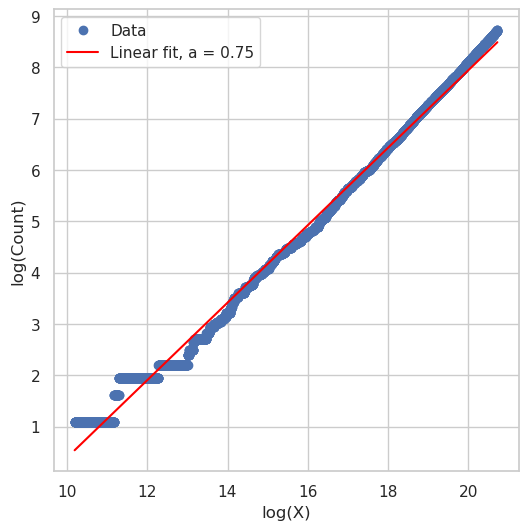

In [35]:
plt.figure(figsize=(6, 6))

# Plot the log-log relationship
plt.plot(log_X_values, log_counts, 'o', label='Data')
plt.plot(log_X_values, np.polyval(coeffs, log_X_values), label=f'Linear fit, a = {a:.2f}',color='red')
plt.xlabel('log(X)')
plt.ylabel('log(Count)')
plt.legend()
plt.show()

In [38]:
import pandas as pd
from tabulate import tabulate

bsd = pd.read_csv('/home/eva/results/datasets/bsd/rk6bsd.csv', names = ['a1','a2','a3','a4','a6','sha','rk','reg','tama','tors','rp'])
bsd.loc[bsd['sha'] == 0, 'sha'] = 1

# Assuming 'df' is your dataframe with columns 'rk' and 'sha'

# Loop through the specified ranks
for rank in range(5,7):  # Change this to (1, 3) if you want to start from rank 1
    temp = bsd[bsd['rk'] == rank]
    sha_values = temp['sha']

    # Count the frequency of each unique 'sha' value
    sha_counts = sha_values.value_counts()

    # Calculate the relative frequencies
    total_count = len(sha_values)
    relative_frequencies = sha_counts / total_count

    # Combine the data into a single DataFrame
    result = pd.DataFrame({'Sha': sha_counts.index, 'Count': sha_counts.values, 'Relative Frequency': relative_frequencies.values})

    # Create headers for the table
    headers = ['Sha', 'Count', 'Relative Frequency']

    # Create a LaTeX table using the 'tabulate' library
    latex_table = tabulate(result, headers=headers, tablefmt='latex_booktabs', showindex=False)

    print(f"Rank: {rank}")
    print(latex_table)
    print("\n" + "=" * 80 + "\n")

Rank: 5
\begin{tabular}{}
\toprule
 Sha   & Count   & Relative Frequency   \\
\midrule
\bottomrule
\end{tabular}


Rank: 6
\begin{tabular}{rrr}
\toprule
   Sha &   Count &   Relative Frequency \\
\midrule
     1 &      53 &                    1 \\
\bottomrule
\end{tabular}


